# Introduction to Computer Vision

In this session, we will discuss:

- Shapes
- More on contours
- Centroid and Area from Contours
- Occulsion

In [1]:
# import packages needed
from IPython.display import HTML
import matplotlib.image as mpimg
import numpy as np
import cv2
import imutils

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys

print(sys.version_info)
print(cv2.__version__)

sys.version_info(major=3, minor=8, micro=13, releaselevel='final', serial=0)
4.5.5


## Shapes

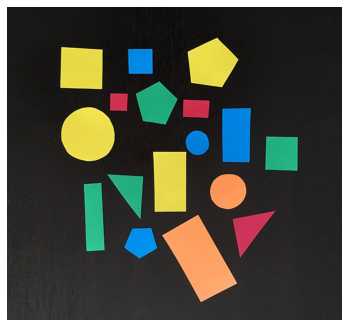

In [3]:
# Example is taken from: https://www.pyimagesearch.com/2016/02/08/opencv-shape-detection/

image = mpimg.imread('shapes_and_colors.jpg')

# ratio is used if we resize the incoming image: default=1.0 means image is not resized
# ratio = image.shape[0] / float(resized.shape[0])
ratio = 1.0

plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis('off')
plt.show()

In [4]:
print("This is a %i pixels by %i pixels image" %(image.shape[0], image.shape[1]))

This is a 561 pixels by 600 pixels image


In [5]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur_gray_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

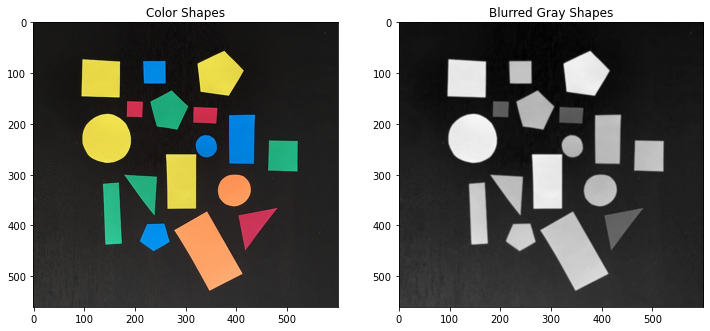

In [6]:
plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.title("Color Shapes")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Blurred Gray Shapes")
plt.imshow(blur_gray_img, cmap="gray")

plt.show()

In [7]:
blur_gray_img

array([[24, 24, 24, ..., 22, 22, 22],
       [24, 24, 24, ..., 22, 22, 22],
       [24, 24, 24, ..., 22, 22, 22],
       ...,
       [55, 55, 54, ..., 39, 40, 40],
       [54, 54, 53, ..., 40, 41, 41],
       [53, 53, 53, ..., 41, 41, 41]], dtype=uint8)

## Thresholding

OpenCV provides a function where you can apply a threshold value range to an image.  For every pixel, the same threshold value is applied. 

If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. The function cv.threshold is used to apply the thresholding.

* First argument is the source image, which should be a grayscale image 
* Second argument is the threshold value which is used to classify the pixel values
* Third argument is the maximum value which is assigned to pixel values exceeding the threshold
* (Optional) Fourth argument is the type of thresholding

See: https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

In [8]:
thresh_img = cv2.threshold(blur_gray_img, 60, 255, cv2.THRESH_BINARY)[1]

# Unfortunately, the cv2.threshold() function returns integer and not uint8 
# which is the expected data type for cv2.findContours() function needed in the next step
# Here, I explicitly convert it to uint8 (unsigned 8-bit integer is from 0 to 255)

thresh_uint8_img = thresh_img.astype(np.uint8)

## Contouring

Find dontours in the thresholded image

In [9]:
# find contours in the thresholded image
cnts = cv2.findContours(thresh_uint8_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [10]:
# It returns a list of (x, y) coordinates of the contours from the image

type(cnts)

tuple

In [46]:
# Uncomment below to see the list of vertices
#cnts

In [12]:
class ShapeDetector:
    def __init__(self):
        pass

    def detect(self, c):
        # initialize the shape name and approximate the contour
        shape = "unidentified"
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.04 * peri, True)

        # if the shape is a triangle, it will have 3 vertices
        if len(approx) == 3:
            shape = "triangle"

        # if the shape has 4 vertices, it is either a square or
        # a rectangle
        elif len(approx) == 4:
            # compute the bounding box of the contour and use the
            # bounding box to compute the aspect ratio
            (x, y, w, h) = cv2.boundingRect(approx)
            ar = w / float(h)

            # a square will have an aspect ratio that is approximately
            # equal to one, otherwise, the shape is a rectangle
            shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"

        # if the shape is a pentagon, it will have 5 vertices
        elif len(approx) == 5:
            shape = "pentagon"

        # otherwise, we assume the shape is a circle
        else:
            shape = "circle"

        # return the name of the shape
        return shape

In [13]:
# Initialize ShapeDetector
sd = ShapeDetector()

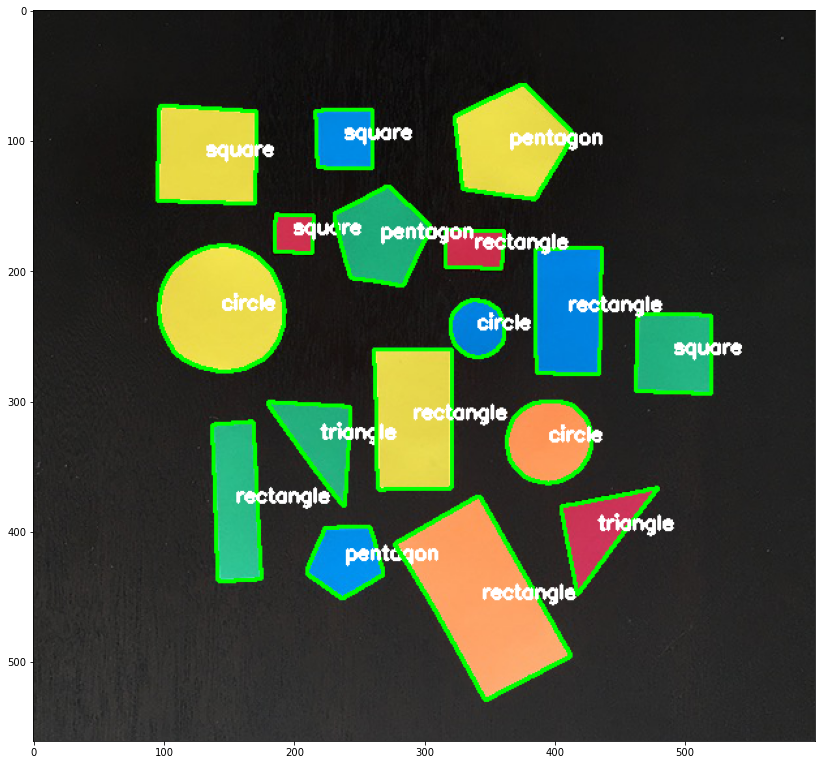

In [14]:
plt.figure(figsize=(14, 14))
image_shape = image.copy()


# loop over the contours
for c in cnts:
    # compute the center of the contour, then detect the name of the
    # shape using only the contour
    
    # M is the moment (weighted average of the image pixel intensity)
    M = cv2.moments(c)
    
    # cX is the x coordinate of the centroid
    # cY is the y coordinate of the centroid
    cX = int((M["m10"] / M["m00"]) * ratio)
    cY = int((M["m01"] / M["m00"]) * ratio)
    
    shape = sd.detect(c)
    
    # multiply the contour (x, y)-coordinates by the resize ratio,
    # then draw the contours and the name of the shape on the image
    c = c.astype("float")
    c *= ratio
    c = c.astype("int")
    
    # Drawing each contour in green (0, 255, 0) on top of the original image
    cv2.drawContours(image_shape, [c], -1, (0, 255, 0), 2)
    
    # Display the text for the image shape
    cv2.putText(image_shape, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    
    # show the contour and text for each contour
    plt.imshow(image_shape)
    
plt.show()

In [15]:
del(sd)

### Concepts

What is an Image Moment?

Image Moment is a particular weighted average of image pixel intensities, with the help of which we can find some specific properties of an image, like radius, area, centroid etc. To find the centroid of the image, we generally convert it to binary format and then find its center.

https://www.learnopencv.com/tag/cv2-moments/

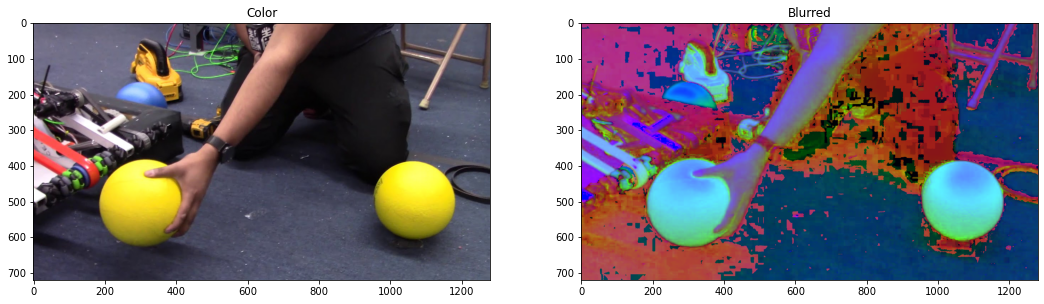

In [16]:
image = mpimg.imread('powercell_ball.jpg')
#gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur_img = cv2.GaussianBlur(image, (3,3), 0)
image_hsv = cv2.cvtColor(blur_img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(18, 18))
plt.subplot(1, 2, 1)
plt.title("Color")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Blurred")
plt.imshow(image_hsv)

plt.show()

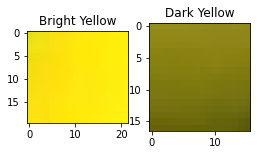

In [17]:
# I took small samplew of the yellow ball to see the HSV representation
#   One sample at the brightest part of the ball
#   One sample at the darkest part of the ball 

bright_yellow = mpimg.imread('bright_yellow.jpg')
dark_yellow   = mpimg.imread('dark_yellow.jpg')

plt.figure(figsize=(4, 4))
plt.subplot(1, 2, 1)
plt.title("Bright Yellow")
plt.imshow(bright_yellow)

plt.subplot(1, 2, 2)
plt.title("Dark Yellow")
plt.imshow(dark_yellow)

plt.show()

In [18]:
bright_yellow_hsv = cv2.cvtColor(bright_yellow, cv2.COLOR_BGR2HSV)
#print("The HSV representation:", bright_yellow_hsv[0:3,:])

In [19]:
dark_yellow_hsv = cv2.cvtColor(dark_yellow, cv2.COLOR_BGR2HSV)
#print("The HSV representation:", dark_yellow_hsv[0:3,:])

__Great!__ Both the bright and dark yellow has hue around 90, I'll group all yellows in the range of 90-95.
I will __threshold__ all the yellow to white (255) in the gray scale image for improve contour detection.

In [20]:
yellow_lower = np.array([90, 10, 50])
yellow_upper = np.array([100, 255, 255])

new_field = cv2.inRange(image_hsv, yellow_lower, yellow_upper)
#new_field[500:501, 900:]

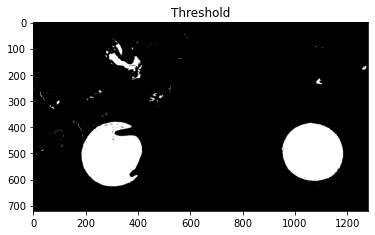

In [21]:
plt.title("Threshold")
plt.imshow(new_field, cmap="gray")
plt.show()

In [22]:
cnts = cv2.findContours(new_field.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# Initialize ShapeDetector
sd = ShapeDetector()

In [23]:
#print(cnts)

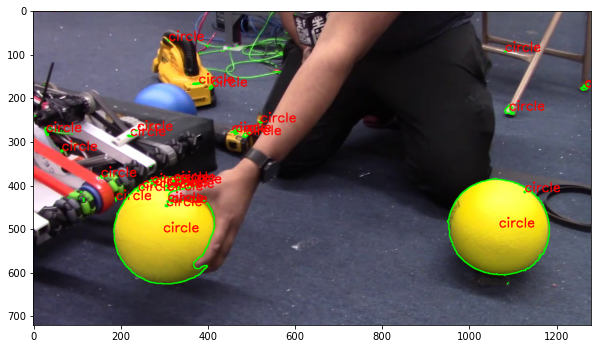

In [24]:
plt.figure(figsize=(10, 10))
image1 = image.copy()

for c in cnts:
    # compute the center of the contour, then detect the name of the
    # shape using only the contour
    
    # M is the moment (weighted average of the image pixel intensity)
    M = cv2.moments(c)
    
    # cX is the x coordinate of the centroid
    # cY is the y coordinate of the centroid
    # We wrap this in a try/except clause due to a division
    #    so we can trap a division by zero    
    try:
        cX = int((M["m10"] / M["m00"]))
        cY = int((M["m01"] / M["m00"]))
    except:
        cX = 0
        cY = 0
    
    shape = sd.detect(c)
    
    if shape == "circle":      
        # Drawing each contour in green (0, 255, 0) on top of the original image
        cv2.drawContours(image1, [c], -1, (0, 255, 0), 2)

        # Display the text for the image shape
        cv2.putText(image1, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

        # show the contour and text for each contour
        plt.imshow(image1)
    
plt.show()
del(image1)

area: 39877.0
area: 41776.5


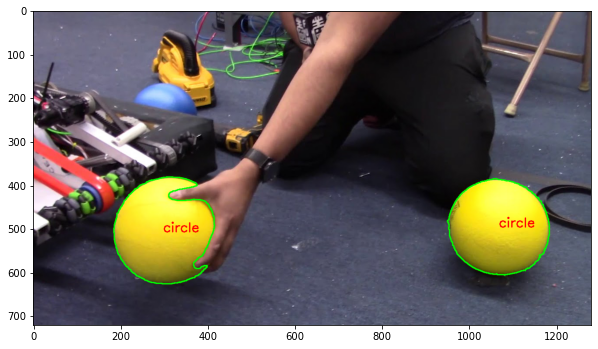

In [25]:
plt.figure(figsize=(10, 10))
image2 = image.copy()

for c in cnts:
    # compute the center of the contour, then detect the name of the
    # shape using only the contour
    
    # M is the moment (weighted average of the image pixel intensity)
    M = cv2.moments(c)
    area = cv2.contourArea(c)
    
    # cX is the x coordinate of the centroid
    # cY is the y coordinate of the centroid
    # We wrap this in a try/except clause due to a division
    #    so we can trap a division by zero
    try:
        cX = int((M["m10"] / M["m00"]))
        cY = int((M["m01"] / M["m00"]))
    except:
        cX = 0
        cY = 0
    
    shape = sd.detect(c)
    
    ## To remove the many little circles, we only want larger circles
    if shape == "circle" and area >= 30000:
        print("area:", area)
        
        # Drawing each contour in green (0, 255, 0) on top of the original image
        cv2.drawContours(image2, [c], -1, (0, 255, 0), 2)

        # Display the text for the image shape
        cv2.putText(image2, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

        # show the contour and text for each contour
        plt.imshow(image2)
    
plt.show()
del(image2)

### Let's put it together

Now, we can put together the pipeline to find circles of specified color range and size in a picture. Since a ball is conveniently a circle from any perspective, we can use this to detect balls in an image.

In [26]:
def find_and_draw_circles(image, lower_color_hsv, upper_color_hsv, min_area_size, 
                          kernel=3, output_text=True, print_centroids=False):
    """
    This takes in a color image, a lower HSV color and an upper HSV color range
    and a minimum pixel area size to detect a circle
    """
    _image = image.copy()
    
    # Blur and convert image to HSV
    _blur_img = cv2.GaussianBlur(_image, (kernel,kernel), 0)
    _hsv_img  = cv2.cvtColor(_blur_img, cv2.COLOR_BGR2HSV)
    
    # Mask the image using the lower/upper hsv range
    _mask_img = cv2.inRange(_hsv_img, lower_color_hsv, upper_color_hsv)
    
    # Find the contours
    _contours = cv2.findContours(_mask_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    _contours = imutils.grab_contours(_contours)
   
    # Initialize ShapeDetector
    _sd = ShapeDetector()
       
    # Loop through contours to find circles
    for _c in _contours:
        # compute the center of the contour, then detect the name of the
        # shape using only the contour

        # M is the moment (weighted average of the image pixel intensity)
        _M = cv2.moments(_c)
        _area = cv2.contourArea(_c)

        # cX is the x coordinate of the centroid
        # cY is the y coordinate of the centroid
        # We wrap this in a try/except clause due to a division
        #    so we can trap a division by zero
        try:
            _cX = int((_M["m10"] / _M["m00"]))
            _cY = int((_M["m01"] / _M["m00"]))
        except:
            _cX = 0
            _cY = 0

        _shape = sd.detect(_c)

        if (_shape == "circle") and (_area >= min_area_size):  
            if print_centroids:
                print("shape: ", shape, "area: ", _area, "center: (", _cX,",", _cY,")")
                
            # Drawing each contour in green (0, 255, 0) on top of the original image
            cv2.drawContours(_image, [_c], -1, (0, 255, 0), 2)

            cv2.circle(_image,(_cX, _cY), 6, (255, 0, 0), -1)
                
            if output_text:
                # Display the text for the image shape
                cv2.putText(_image, _shape, (_cX+10, _cY), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
    return _image

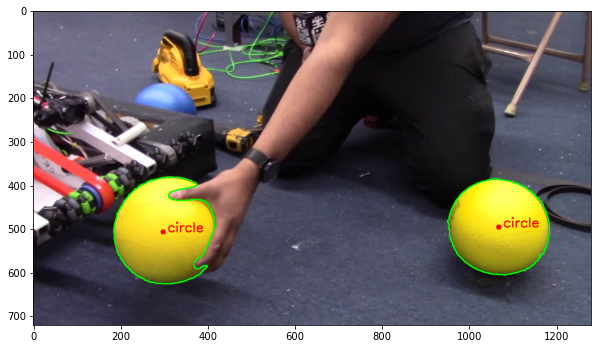

In [27]:
yellow_lower = np.array([90, 10, 50])
yellow_upper = np.array([100, 255, 255])
minimum_area_size = 10000

plt.figure(figsize=(10, 10))
image = mpimg.imread('powercell_ball.jpg')

draw_ball_image = find_and_draw_circles(image, yellow_lower, yellow_upper, minimum_area_size, 3, True, False)

plt.imshow(draw_ball_image)
plt.show()

del(draw_ball_image)

### Test  our function

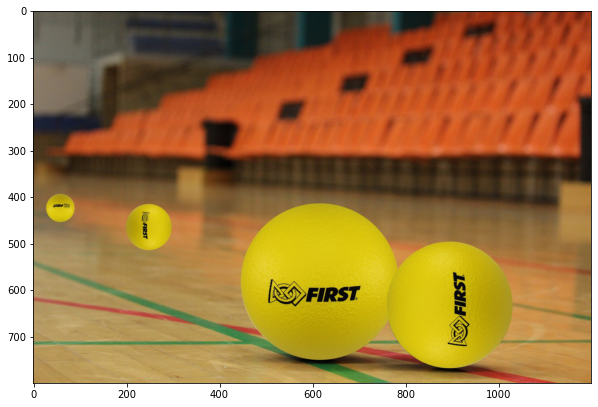

In [28]:
plt.figure(figsize=(10, 10))

gym_balls_img = mpimg.imread('gym_with_balls.jpg')
plt.imshow(gym_balls_img)
plt.show()

### Noisy Contours

If we use the lower and upper bounds for yellow from above, we get a very noisy contours.
Since the gym floor is a beige/yellow, it falls into our lower and upper range of yellow.
When using colors to find shapes, you will need to tune the colors very precisely for each application.

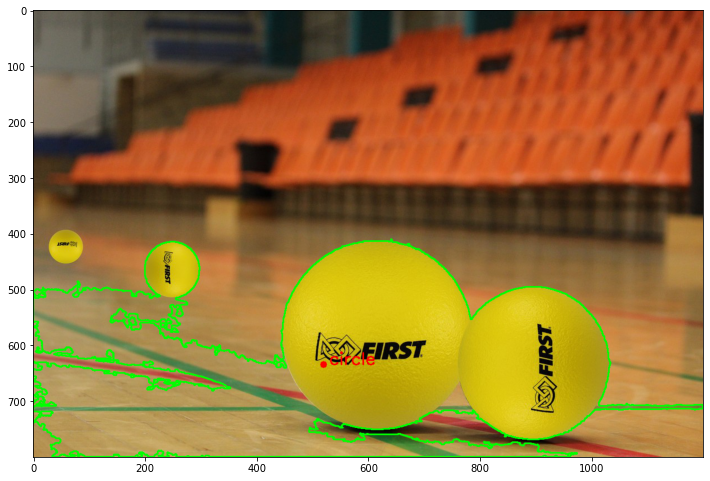

In [29]:
yellow_lower = np.array([50, 10, 50])
yellow_upper = np.array([100, 255, 255])
minimum_area_size = 10000

plt.figure(figsize=(12, 12))

gym_balls_img1 = find_and_draw_circles(gym_balls_img, yellow_lower, yellow_upper, minimum_area_size, 3, True, False)

plt.imshow(gym_balls_img1)
plt.show()

del(gym_balls_img1)

### Tuning the colors for the Powercell balls

I took a snippet of the bright and darker yellow from the ball and converted into HSV so I can look at the range of hue for that specific ball.

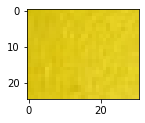

array([[[ 93, 244, 209],
        [ 93, 241, 212],
        [ 93, 239, 213],
        [ 93, 241, 212],
        [ 93, 237, 215],
        [ 93, 235, 218],
        [ 93, 237, 216],
        [ 93, 234, 219],
        [ 93, 233, 220],
        [ 93, 236, 217]]], dtype=uint8)

In [30]:
yellow1 = mpimg.imread('powercell_small1.jpg')
yellow1_hsv = cv2.cvtColor(yellow1, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(2, 2))
plt.imshow(yellow1)
plt.show()

yellow1_hsv[0:1,0:10]

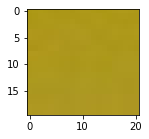

array([[[ 94, 224, 172],
        [ 94, 223, 173],
        [ 94, 221, 174],
        [ 94, 223, 173],
        [ 94, 221, 172],
        [ 94, 222, 171],
        [ 94, 221, 172],
        [ 94, 221, 172],
        [ 94, 222, 171],
        [ 94, 220, 173]]], dtype=uint8)

In [31]:
yellow2 = mpimg.imread('powercell_small2.jpg')
yellow2_hsv = cv2.cvtColor(yellow2, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(2, 2))
plt.imshow(yellow2)
plt.show()

yellow2_hsv[0:1,0:10]

### Tune the colors you want to detect

I noticed the Hue is in the mid-90s, I'll make my Hue range from 90-98.
Next, I see that the Saturation is very high (in the high 220s), I'll make my Saturation to be greater than 190.   Lastly, I see that the Value for the darker yellow is in the lower 170s, I'll make my Value range to be greater than 150.

This is how I tune the colors to find the Powercell balls more precisely without getting the backgound and the gym floor.

shape:  circle area:  7390.0 center: ( 249 , 464 )
shape:  circle area:  143466.5 center: ( 724 , 599 )
shape:  circle area:  3112.5 center: ( 918 , 634 )
shape:  circle area:  2736.0 center: ( 58 , 423 )


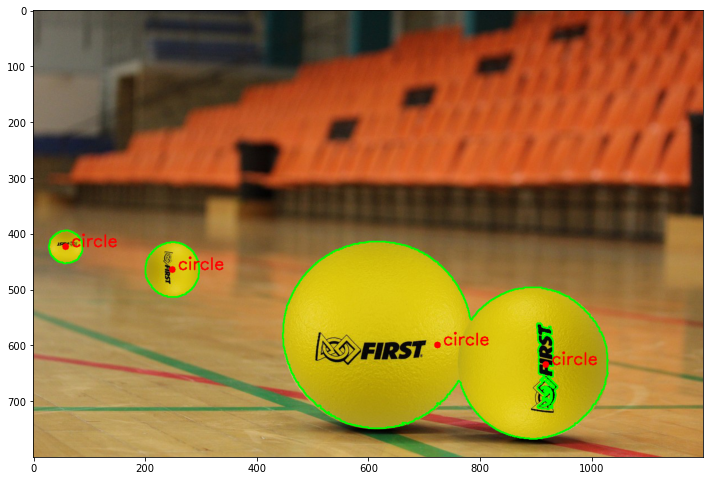

In [32]:
yellow_lower = np.array([90, 190, 150])
yellow_upper = np.array([98, 255, 255])
minimum_area_size = 2000

plt.figure(figsize=(12, 12))

gym_balls_img1 = find_and_draw_circles(gym_balls_img, yellow_lower, yellow_upper, minimum_area_size, 3, True, True)

plt.imshow(gym_balls_img1)
plt.show()

del(gym_balls_img1)

## Conclusion

When we use only color to detect balls, it does not do a great job in finding objects that are partially hidden behind one another.  This is a big challenge in computer vision called __occulsion__.  There are many academic papers and discussions on how to overcome the occulsion issue.  

In general, you will need a number of techniques to better detect objects.  One of the main developments in the last decade is the use of neural network where you can feed in different examples of the objects (i.e. training data set) for the algorithm to learn to find the objects.

### Exercise 1:  Detect Powercell Balls

Find the yellow lower an upper HSV color range and area needed to detect as many yellow balls as possible.

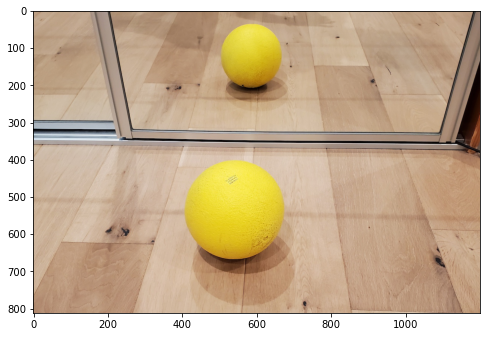

In [33]:
balls_img = mpimg.imread('powercell_mirror_balls.jpg')

plt.figure(figsize=(8,8))
plt.imshow(balls_img)
plt.show()

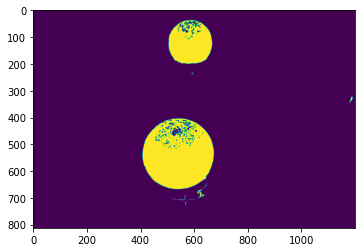

In [115]:
# Find the appropriate yellow color ranges and blur kernel for best thresholding the balls

yellow_lower = np.array([93, 133, 152])
yellow_upper = np.array([110, 255, 255])

blur_img = cv2.GaussianBlur(balls_img, (5,5), 0)
hsv_img  = cv2.cvtColor(blur_img, cv2.COLOR_BGR2HSV)

new_field = cv2.inRange(hsv_img, yellow_lower, yellow_upper)

plt.imshow(new_field)
plt.show()

In [35]:
# Here are some yellow colors taken from the balls above

yellow1 = mpimg.imread('yellow1.jpg')
yellow1_hsv = cv2.cvtColor(yellow1, cv2.COLOR_BGR2HSV)

yellow2 = mpimg.imread('yellow2.jpg')
yellow2_hsv = cv2.cvtColor(yellow2, cv2.COLOR_BGR2HSV)

yellow3 = mpimg.imread('yellow3.jpg')
yellow3_hsv = cv2.cvtColor(yellow3, cv2.COLOR_BGR2HSV)

print("yellow1:", yellow1_hsv[0:1,0:5])
print("yellow2:", yellow2_hsv[0:1,0:5])
print("yellow3:", yellow3_hsv[0:1,0:5])

yellow1: [[[ 94 203 236]
  [ 94 207 230]
  [ 94 213 224]
  [ 94 214 223]
  [ 94 206 229]]]
yellow2: [[[ 98 220 210]
  [ 98 218 212]
  [ 97 217 210]
  [ 97 218 209]
  [ 97 218 209]]]
yellow3: [[[ 94 202 233]
  [ 94 199 238]
  [ 94 199 238]
  [ 94 204 232]
  [ 94 198 241]]]


shape:  circle area:  55015.0 center: ( 541 , 535 )
shape:  circle area:  21208.5 center: ( 585 , 120 )


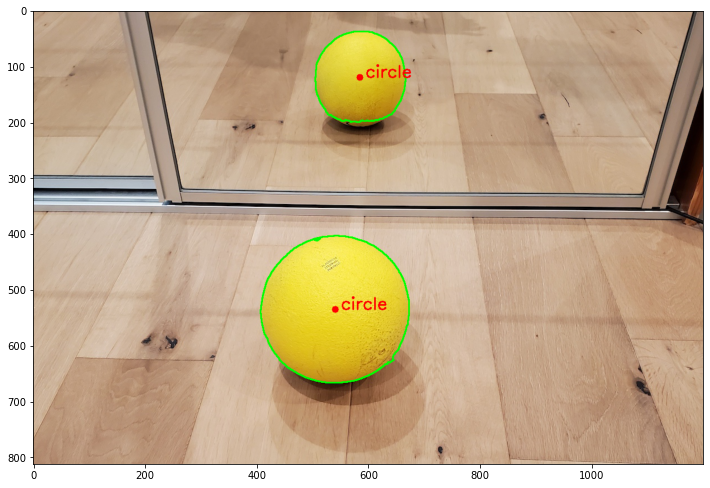

In [114]:
# Find the appropriate parameters to detect the balls

yellow_lower = np.array([93, 133, 152])
yellow_upper = np.array([110, 255, 250])
minimum_area_size = 300
kernel = 3

plt.figure(figsize=(12, 12))
balls_img1 = find_and_draw_circles(balls_img, yellow_lower, yellow_upper, minimum_area_size, kernel, True, True)

plt.imshow(balls_img1)
plt.show()

del(balls_img1)

### Exercise 2: Detect Powercell balls with writing

Try to detect a ball with some writing on it.

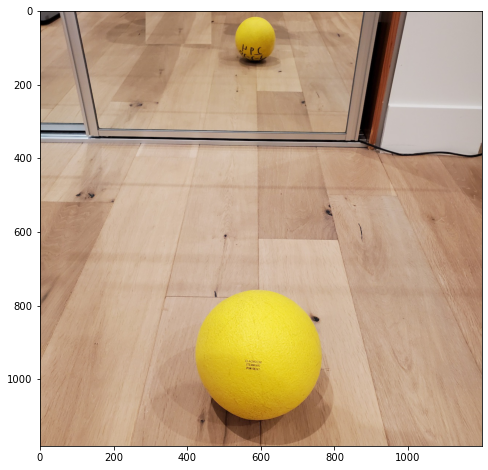

In [37]:
balls_img2 = mpimg.imread('powercell_mirror_balls2.jpg')

plt.figure(figsize=(8,8))
plt.imshow(balls_img2)
plt.show()

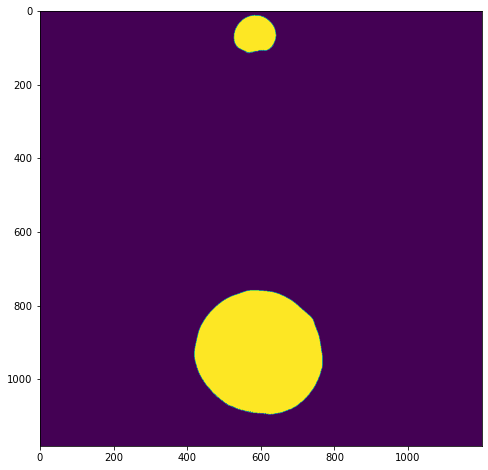

In [141]:
# Find the appropriate yellow color ranges and blur kernel for best thresholding the balls

yellow_lower = np.array([90, 123, 90])
yellow_upper = np.array([100, 255, 255])

blur_img = cv2.GaussianBlur(balls_img2, (55,55), 0)
hsv_img  = cv2.cvtColor(blur_img, cv2.COLOR_BGR2HSV)

new_field = cv2.inRange(hsv_img, yellow_lower, yellow_upper)

plt.figure(figsize=(8,8))
plt.imshow(new_field)
plt.show()

shape:  circle area:  93414.0 center: ( 594 , 933 )
shape:  circle area:  10621.5 center: ( 583 , 70 )


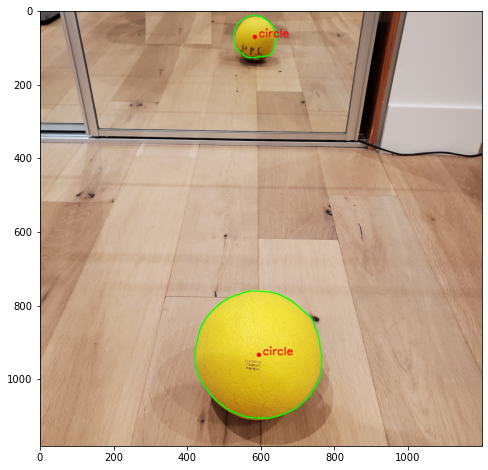

In [180]:
# Find the appropriate parameters to detect the balls

yellow_lower = np.array([90, 132, 90])
yellow_upper = np.array([102, 255, 255])
minimum_area_size = 100
kernel = 51

plt.figure(figsize=(8,8))
contour_balls_img2 = find_and_draw_circles(balls_img2, yellow_lower, yellow_upper, minimum_area_size, kernel, True, True)

plt.imshow(contour_balls_img2)
plt.show()

del(contour_balls_img2)

### Exercise 3: Detect Powercell ball with pattern background

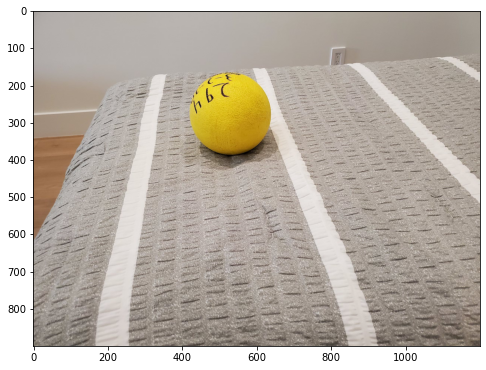

In [40]:
balls_img3 = mpimg.imread('powercell_ball_pattern.jpg')

plt.figure(figsize=(8,8))
plt.imshow(balls_img3)
plt.show()

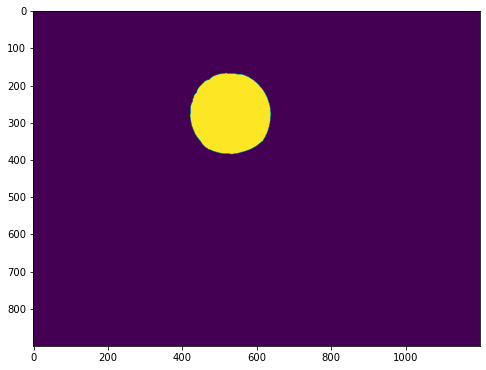

In [189]:
# Find the appropriate yellow color ranges and blur kernel for best thresholding the ball

yellow_lower = np.array([90, 132, 90])
yellow_upper = np.array([105, 255, 255])

blur_img = cv2.GaussianBlur(balls_img3, (13,13), 0)
hsv_img  = cv2.cvtColor(blur_img, cv2.COLOR_BGR2HSV)

new_field = cv2.inRange(hsv_img, yellow_lower, yellow_upper)

plt.figure(figsize=(8,8))
plt.imshow(new_field)
plt.show()

shape:  circle area:  37005.5 center: ( 529 , 275 )


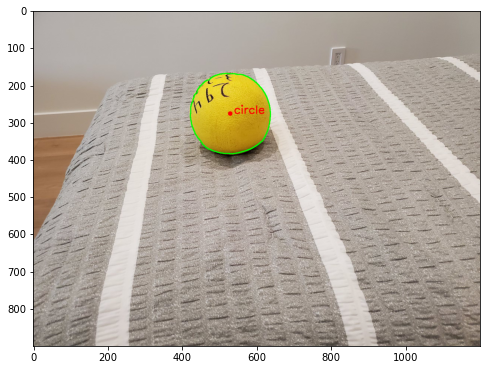

In [190]:
# Find the appropriate parameters to detect the balls

yellow_lower = np.array([90, 132, 90])
yellow_upper = np.array([105, 255, 255])
minimum_area_size = 100
kernel = 13

plt.figure(figsize=(8,8))
contour_balls_img3 = find_and_draw_circles(balls_img3, yellow_lower, yellow_upper, minimum_area_size, kernel, True, True)

plt.imshow(contour_balls_img3)
plt.show()

del(contour_balls_img3)

### Exercise 4: Infinite Recharge Field

Try to detect the photoshopped balls added in the foreground. The six largest foreground balls are photoshopped there so it should be much easier to detect. However, the remaining balls are original to the photograph. If you can find at least 6 balls, you're doing well!

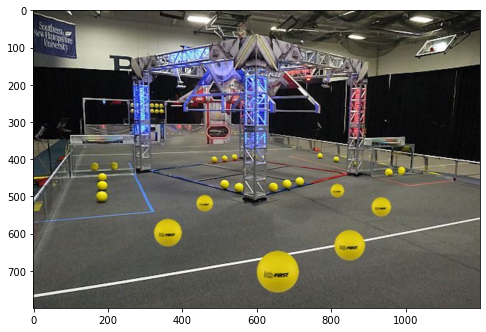

In [43]:
balls_img4 = mpimg.imread('infinite_recharge_field.jpg')

plt.figure(figsize=(8,8))
plt.imshow(balls_img4)
plt.show()

shape:  circle area:  10016.5 center: ( 656 , 701 )
shape:  circle area:  5353.0 center: ( 849 , 630 )
shape:  circle area:  4415.0 center: ( 361 , 596 )
shape:  circle area:  2207.5 center: ( 934 , 527 )
shape:  circle area:  1569.5 center: ( 460 , 517 )
shape:  circle area:  343.5 center: ( 182 , 503 )
shape:  circle area:  1050.5 center: ( 816 , 484 )
shape:  circle area:  271.5 center: ( 643 , 477 )
shape:  circle area:  207.0 center: ( 680 , 469 )
shape:  circle area:  332.5 center: ( 514 , 468 )
shape:  circle area:  222.5 center: ( 715 , 459 )
shape:  circle area:  306.5 center: ( 955 , 436 )
shape:  circle area:  320.5 center: ( 990 , 430 )
shape:  circle area:  214.5 center: ( 216 , 419 )
shape:  circle area:  202.0 center: ( 332 , 256 )


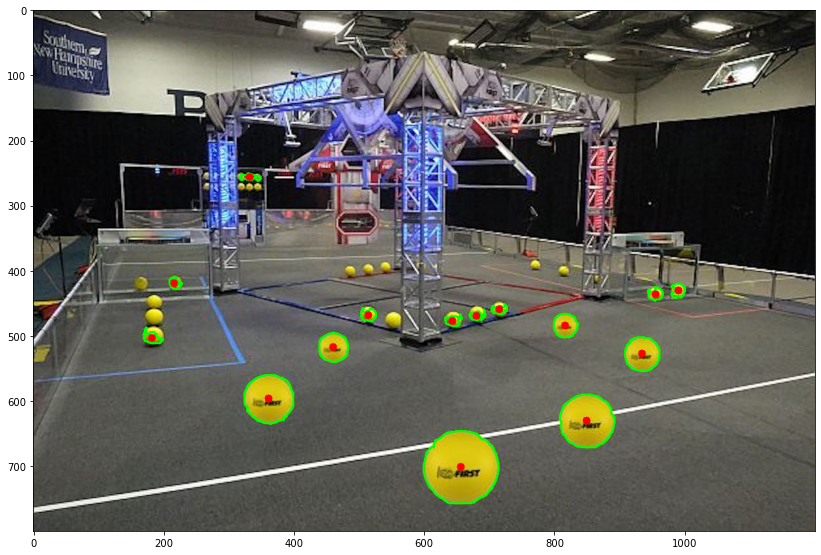

In [196]:
# Find the appropriate yellow color ranges and blur kernel for best thresholding the ball
#   Try to find at least the largest 6 balls
#   You don't have to find all the smaller balls in the background

yellow_lower = np.array([92, 132, 90])
yellow_upper = np.array([105, 255, 255])
minimum_area_size = 200
kernel = 13

plt.figure(figsize=(14, 14))
contour_balls_img4 = find_and_draw_circles(balls_img4, yellow_lower, yellow_upper, minimum_area_size, kernel, False, True)

plt.imshow(contour_balls_img4)
plt.show()

del(contour_balls_img4)